# Assignment 3

In [105]:
import numpy as np
import scipy.special as sp
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'pylab', 'time', 'f', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Function definition

In [106]:
def func(t,A,B):
    return A*sp.jn(2,t) + B*t

## Extracting and visualizing the data

Text(0.5,0,'t$\\rightarrow$')

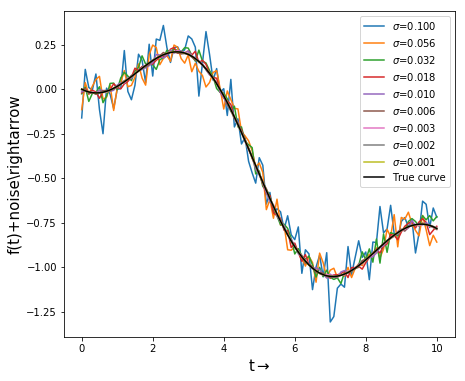

In [118]:
data_columns = []
data_columns = loadtxt('fitting2.dat',dtype=float)
time  = np.array(data_columns[:,0])
y_columns = np.asarray(data_columns)[:,1:]
sigma = np.logspace(-1,-3,9)
# Plotting :
pylab.figure(figsize=(7,6))
for i in range(9):
    pylab.plot(time,y_columns[:,i],label=r'$\sigma$=%.3f'%sigma[i])
pylab.plot(time,func(time,1.05,-0.105),'-k',label='True curve')
pylab.legend(loc='upper right')
pylab.ylabel(r'f(t)+noise$\rightarrow$',fontsize=15)
pylab.xlabel(r't$\rightarrow$',fontsize=15)

## The Errorbar plot

array([0.1       , 0.05623413, 0.03162278, 0.01778279, 0.01      ,
       0.00562341, 0.00316228, 0.00177828, 0.001     ])

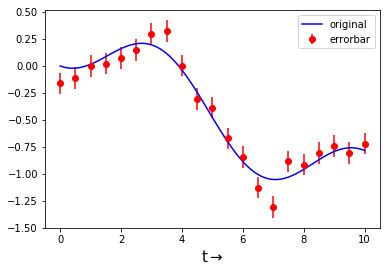

In [108]:
data = y_columns[:,0]
errorbar(time[::5],data[::5],sigma[0],fmt='ro',label='errorbar')
pylab.plot(time,func(time,1.05,-0.105),'b',label='original')
pylab.legend(loc='upper right')
pylab.xlabel(r't$\rightarrow$',fontsize=15)
sigma

## The Matrix equation

In [109]:
fn_column = sp.jn(2,time)
M = pylab.c_[fn_column,time]

In [110]:
A = 1.05; B = -0.105
C = np.array([A,B]) # the parameter array
G = np.matmul(M,C) # matrix obtained by matrix multiplication

In [111]:
G1 = np.array(func(time,A,B)) # matrix obtained directly from the function
# Testing equality
np.array_equal(G,G1)

True

## The Error function

In [112]:
#initialization
e = np.zeros((21,21,9))
A = np.linspace(0,2,21)

B = np.linspace(-0.2,0,21)

for k in range(9):
    f = y_columns[:,k]
    for i in range(21):
        for j in range(21):
            e[i][j][k] = np.sum((f -np.array(func(time,A[i],B[j])))**2)/101



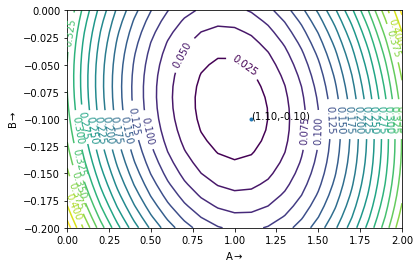

In [113]:
# plotting the contour and locating the minima
plot = pylab.contour(A,B,e[:,:,0],20)
pylab.ylabel(r'B$\rightarrow$')
pylab.xlabel(r'A$\rightarrow$')
pylab.clabel(plot,inline=1,fontsize=10)
# Using np.unravel_index to obtain the location of the minima in the original array
a = np.unravel_index(np.argmin(e[:,:,0]),e[:,:,0].shape)
pylab.plot(A[a[0]],B[a[1]],'o',markersize=3)
pylab.annotate('(%0.2f,%0.2f)'%(A[a[0]],B[a[1]]),(A[a[0]],B[a[1]]))
plot

## Least mean square estimation

In [114]:
est = [np.linalg.lstsq(M,y_columns[:,i])[0] for i in range(9)]
est = np.asarray(est)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [115]:
# Obtaining the error in A and B 
error_a = abs(est[:,0]-1.05)
error_b = abs(est[:,1]+0.105)

## The Error vs $\sigma_{n}$ plot

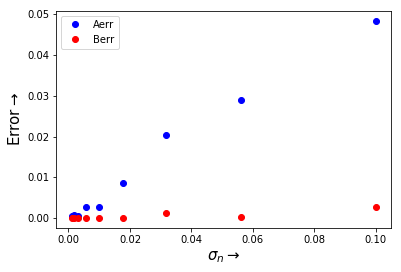

In [116]:
pylab.plot(sigma,error_a,'bo',label='Aerr')
pylab.plot(sigma,error_b,'ro',label='Berr')
pylab.ylabel(r'Error$\rightarrow$',fontsize=15)
pylab.xlabel(r'$\sigma_{n}\rightarrow$',fontsize=15)
pylab.legend(loc='upper left')

## Error vs $\sigma_{n}$ plot : The $log$ scale

Text(0,0.5,'Error$\\rightarrow$')

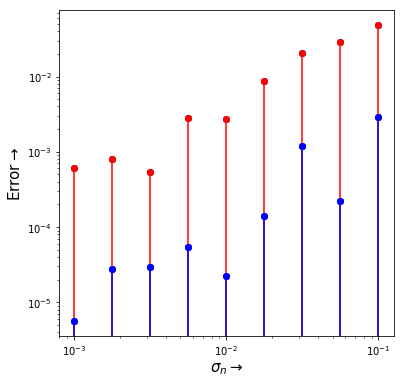

In [117]:
pylab.figure(figsize=(6,6))
pylab.loglog(sigma,error_a,'ro')
pylab.stem(sigma,error_a,'-ro')
pylab.loglog(sigma,error_b,'bo')
pylab.stem(sigma,(error_b),'-bo')
pylab.xlabel(r'$\sigma_{n}\rightarrow$',fontsize=15)
pylab.ylabel(r'Error$\rightarrow$',fontsize=15)